In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
h = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart Disease data.csv")

In [34]:
h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [35]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
h.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


1: Heart Disease present
0: Heart Disease absent


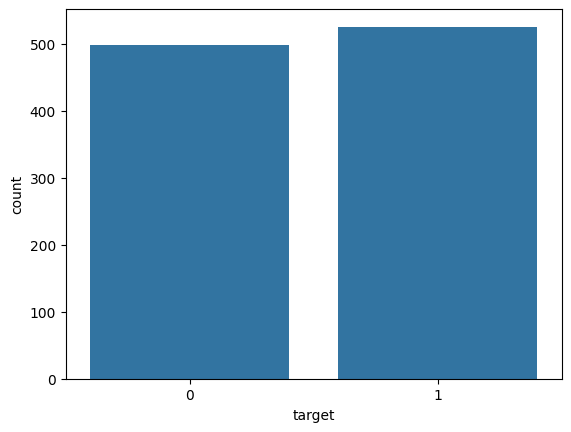

In [37]:
sns.countplot(x = "target", data = h)
print("1: Heart Disease present")
print("0: Heart Disease absent")

sex:
 1:Male 
 0:Female
target:
 1: Heart Disease present 
 0: Heart Disease absent 


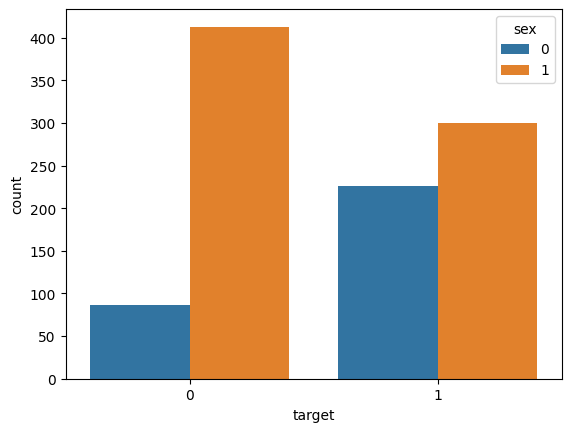

In [38]:
sns.countplot(x = "target", data = h, hue = 'sex')
print("sex:\n 1:Male \n 0:Female")
print("target:\n 1: Heart Disease present \n 0: Heart Disease absent ")

In [39]:
h['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [40]:
h['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

<Axes: >

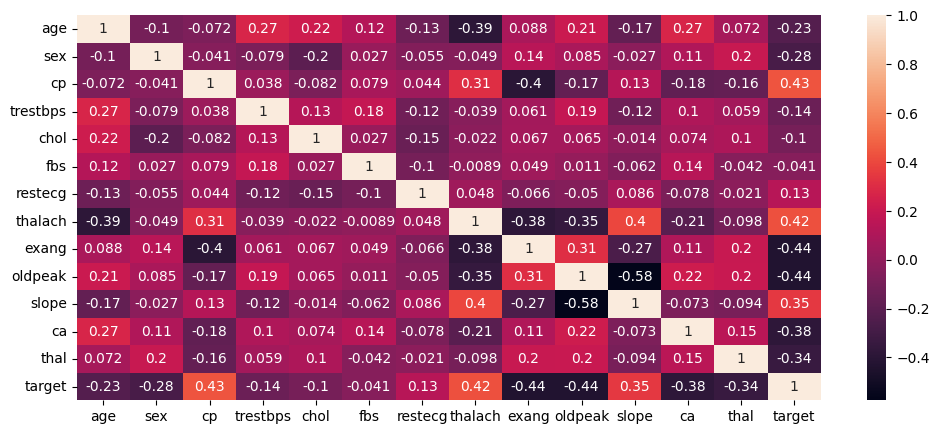

In [41]:
plt.figure(figsize = (12,5))
sns.heatmap(h.corr(), annot = True)

<Axes: xlabel='age'>

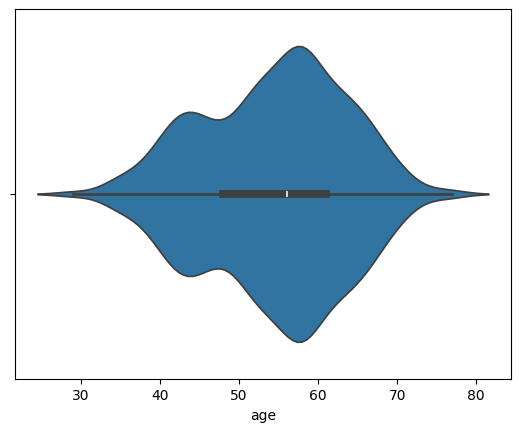

In [42]:
sns.violinplot(x = 'age', data = h)

<Axes: xlabel='target', ylabel='thalach'>

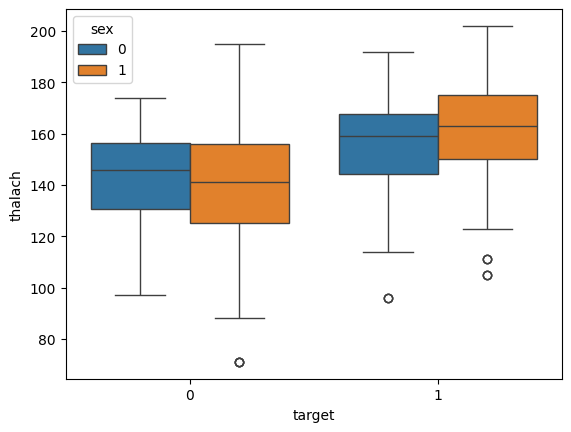

In [43]:
 sns.boxplot(x = 'target', y = 'thalach', data = h, hue = 'sex')

<Axes: xlabel='age', ylabel='Count'>

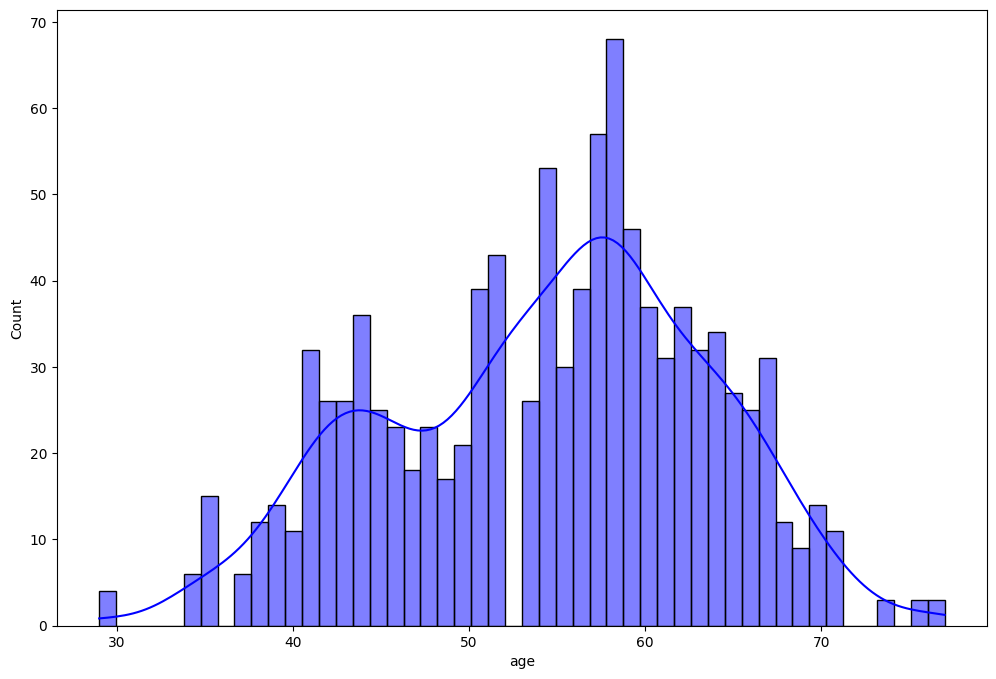

In [44]:
plt.figure(figsize = (12,8))
sns.histplot(h['age'], color = 'b',kde = True, bins = 50)

<Axes: xlabel='cp', ylabel='count'>

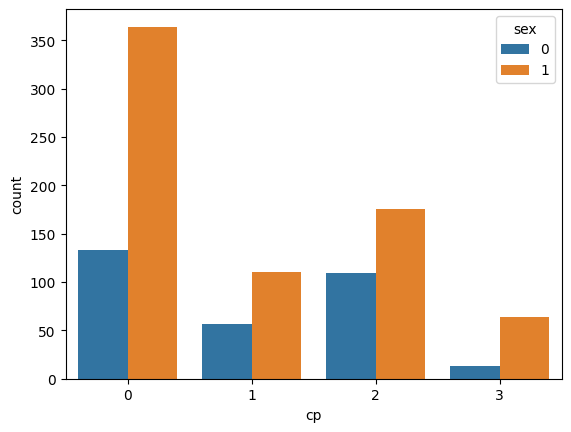

In [45]:
sns.countplot(x = 'cp', data = h, hue = 'sex')

<Axes: xlabel='restecg', ylabel='count'>

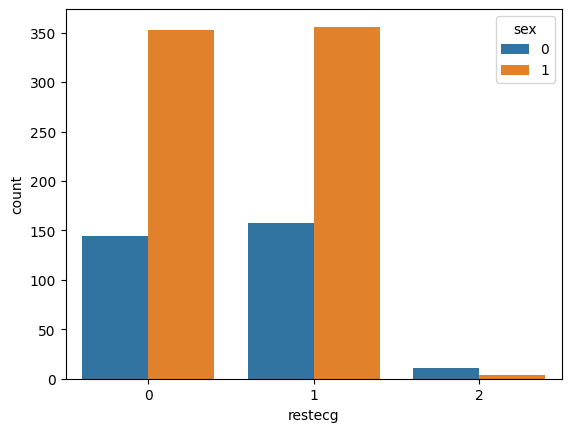

In [46]:
sns.countplot(x = 'restecg', data = h, hue = 'sex')

<Axes: xlabel='restecg', ylabel='count'>

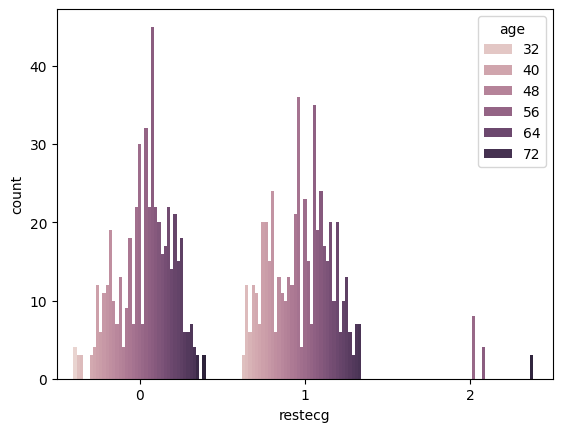

In [47]:
sns.countplot(x = 'restecg', data = h, hue = 'age')

In [48]:
X = h.drop('target', axis = 1)
y = h[['target']]

In [49]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [50]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [51]:
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)
y_scaled = Scaler.fit_transform(y)

In [52]:
X_scaled.shape

(1025, 13)

In [53]:
y_scaled.shape

(1025, 1)

In [54]:
print("X_scaled values:\n", X_scaled)
print("y_scaled values:\n", y_scaled)

X_scaled values:
 [[0.47916667 1.         0.         ... 1.         0.5        1.        ]
 [0.5        1.         0.         ... 0.         0.         1.        ]
 [0.85416667 1.         0.         ... 0.         0.         1.        ]
 ...
 [0.375      1.         0.         ... 0.5        0.25       0.66666667]
 [0.4375     0.         0.         ... 1.         0.         0.66666667]
 [0.52083333 1.         0.         ... 0.5        0.25       1.        ]]
y_scaled values:
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 13)
(820, 1)
(205, 13)
(205, 1)


In [57]:
Classifier_model = tf.keras.models.Sequential([Dense(64, activation = 'relu', input_shape = (13,)),
                                               Dense(32, activation = 'relu'),
                                               Dense(32, activation = 'relu'),
                                               Dense(16, activation = 'relu'),
                                               Dense(16, activation = 'relu'),
                                               Dense(8, activation = 'relu'),
                                               Dense(1, activation = 'sigmoid')])
Classifier_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                896       
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                

In [58]:
Classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', patience = 2)
Classifier_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, callbacks = [es])

Epoch 1/25
26/26 [==============================] - 2s 12ms/step - loss: 0.6728 - accuracy: 0.5146 - val_loss: 0.6245 - val_accuracy: 0.6244
Epoch 2/25
26/26 [==============================] - 0s 4ms/step - loss: 0.5919 - accuracy: 0.7427 - val_loss: 0.5568 - val_accuracy: 0.8439
Epoch 3/25
26/26 [==============================] - 0s 5ms/step - loss: 0.5297 - accuracy: 0.8293 - val_loss: 0.4719 - val_accuracy: 0.8293
Epoch 4/25
26/26 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.8561 - val_loss: 0.4009 - val_accuracy: 0.8878
Epoch 5/25
26/26 [==============================] - 0s 4ms/step - loss: 0.3747 - accuracy: 0.8683 - val_loss: 0.3441 - val_accuracy: 0.8683
Epoch 6/25
26/26 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.8817 - val_loss: 0.3342 - val_accuracy: 0.8878
Epoch 7/25
26/26 [==============================] - 0s 5ms/step - loss: 0.2942 - accuracy: 0.8963 - val_loss: 0.3061 - val_accuracy: 0.8829
Epoch 8/25
26/26 [=

<Axes: >

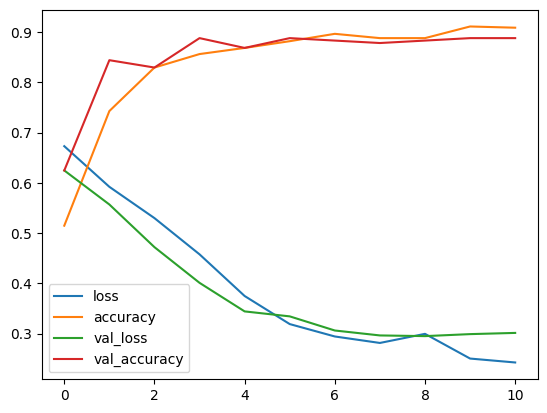

In [59]:
hist = Classifier_model.history.history
new_hist = pd.DataFrame(hist)
new_hist.plot()

In [60]:
y_test_predict = Classifier_model.predict(X_test)
y_train_predict = Classifier_model.predict(X_train)

26/26 [==============================] - 0s 2ms/step


In [61]:
y_test_predict = y_test_predict > 0.5
y_train_predict = y_train_predict > 0.5

In [62]:
cm = confusion_matrix(y_test_predict, y_test)
cm2 = confusion_matrix(y_train_predict, y_train)

<Axes: >

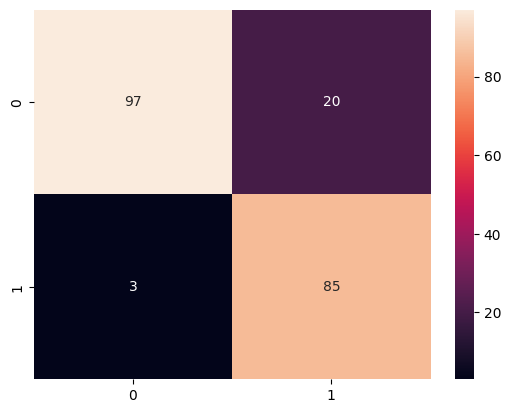

In [63]:
sns.heatmap(cm, annot = True)

<Axes: >

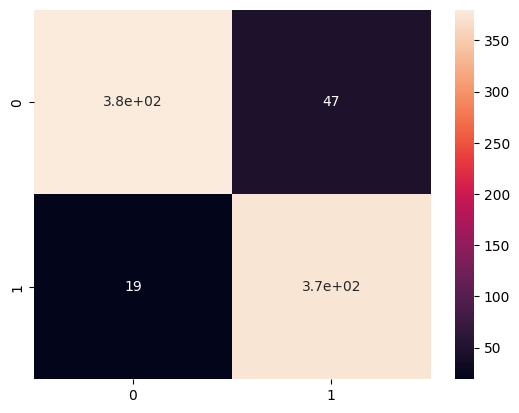

In [64]:
sns.heatmap(cm2, annot = True)

In [65]:
print("Training Report:\n", classification_report(y_test_predict, y_test))
print("Testing Report:\n", classification_report(y_train_predict, y_train))

Training Report:
               precision    recall  f1-score   support

       False       0.97      0.83      0.89       117
        True       0.81      0.97      0.88        88

    accuracy                           0.89       205
   macro avg       0.89      0.90      0.89       205
weighted avg       0.90      0.89      0.89       205

Testing Report:
               precision    recall  f1-score   support

       False       0.95      0.89      0.92       427
        True       0.89      0.95      0.92       393

    accuracy                           0.92       820
   macro avg       0.92      0.92      0.92       820
weighted avg       0.92      0.92      0.92       820



In [66]:
Classifier_model.save("Heart_Disease_Predictor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
import pickle
pickle.dump(Scaler,open("scaler.pkl", "wb"))

In [68]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [69]:
model = load_model("Heart_Disease_Predictor.h5")

In [70]:
def return_prediction(model, Scaler, sample_json):
  a = sample_json['age']
  s = sample_json['sex']
  c = sample_json['trestbps']
  o = sample_json['chol']
  f = sample_json['fbs']
  r = sample_json['restecg']
  t = sample_json['thalach']
  e = sample_json['exang']
  p = sample_json['oldpeak']
  st = sample_json['slope']
  cc = sample_json['ca']
  l = sample_json['thal']
  dc = [[a,s,c,o,f,r,t,e,p,st,cc,l]]
  dc = Scaler.fit_transform(dc)
  predict = model.predict(dc)
  classes = np.argmax(predict, axis = 1)
  return classes